In [2]:
import os
import glob
import pydicom
import nibabel as nib
import pandas as pd
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from tqdm import tqdm

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../code/")

from utils.dcm_utils import *
from utils.nii_utils import *
from utils.train_utils import *
from utils.xray_utils import *

from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DATA_DIR = "/Volumes/SSD970/"

TRAIN_SEG_DIR = os.path.join(DATA_DIR, "segmentations")
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, "train_images")
SEG_IMAGES_DIR = os.path.join(DATA_DIR, "segmentation_images")
SEG_AXIAL_LABELS_DIR = os.path.join(DATA_DIR, "segmentation_axial_labels_8")
SEG_SAGITTAL_LABELS_DIR = os.path.join(DATA_DIR, "segmentation_sagittal_labels")
SEG_CORONAL_LABELS_DIR = os.path.join(DATA_DIR, "segmentation_coronal_labels")

In [4]:
nii_files = glob.glob(TRAIN_SEG_DIR + "/**")

In [5]:
df = pd.read_csv(os.path.join(DATA_DIR, 'meta_segmentation_sagittal.csv'))
df = df.set_index('UID')
df.head()

,sagittal_index,z_spacing,pixel_spacing,aspect,width,height,is_flip
UID,,,,,,,
1.2.826.0.1.3680043.10633,0,0.5,0.285156,1.753425,512,752,0
1.2.826.0.1.3680043.10633,1,0.5,0.285156,1.753425,512,752,0
1.2.826.0.1.3680043.10633,2,0.5,0.285156,1.753425,512,752,0
1.2.826.0.1.3680043.10633,3,0.5,0.285156,1.753425,512,752,0
1.2.826.0.1.3680043.10633,4,0.5,0.285156,1.753425,512,752,0


In [6]:
# nii_path = nii_files[0]
# seg_mask = nib.load(nii_path).get_fdata()
# seg_mask = np.rot90(seg_mask, axes=(0, 1))
# seg_mask = seg_mask.transpose((2, 0, 1))
# seg_mask = np.flip(seg_mask, axis=0)
#
# seg_mask[seg_mask > 7] = 0
# UID = get_uid_from_niipath(nii_path)
# save_sagittal_labels(UID, seg_mask)

In [7]:
# plt.imshow(seg_mask[:, :, 245])

In [8]:
# def save_sagittal_labels(patient_id, imgs):
#     file_dir = os.path.join(SEG_SAGITTAL_LABELS_DIR, patient_id)
#     patient_df = df.loc[patient_id].iloc[0]
#     image_size = [int(patient_df.width), int(patient_df.height)]
#     os.mkdir(file_dir)
#     for i in range(imgs.shape[2]):
#         filepath = os.path.join(file_dir, f'{i}.png')
#         img = Image.fromarray(np.uint8(imgs[:, :, i] * 32), 'L')
#         img = img.resize(image_size, resample=Image.NEAREST)
#         img.save(filepath)

## NOTE THAT
 1 ~ 8 => 0.5 ~ 7.5, the label must be ceiled

In [33]:
def save_axial_labels(patient_id, imgs):
    """
    NOTE THAT
    1 ~ 8 -> 0.5 ~ 7.5
    :param patient_id:
    :param imgs:
    :return:
    """
    file_dir = os.path.join(SEG_AXIAL_LABELS_DIR, patient_id)
    imgs = imgs * 32
    imgs = np.clip(imgs - 16, a_min=0, a_max=256)
    imgs = np.uint8(imgs)

    os.mkdir(file_dir)
    for i in range(imgs.shape[0]):
        filepath = os.path.join(file_dir, f'{i}.png')
        img = Image.fromarray(imgs[i, :, :], 'L')
        # img = img.resize(image_size, resample=Image.NEAREST)
        img.save(filepath)

In [ ]:
# nii_path = nii_files[0]
# seg_mask = nib.load(nii_path).get_fdata()
# seg_mask = np.rot90(seg_mask, axes=(0, 1))
# seg_mask = seg_mask.transpose((2, 0, 1))
# seg_mask = np.flip(seg_mask, axis=0)


144.0


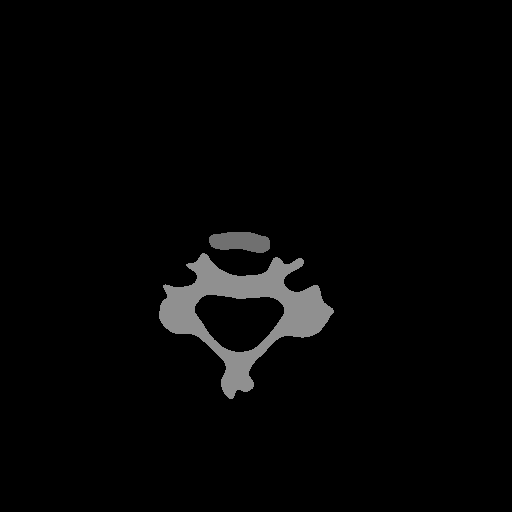

In [29]:

# seg_mask[seg_mask > 8] = 0
# UID = get_uid_from_niipath(nii_path)
# # save_axial_labels(UID, seg_mask)
# imgs = seg_mask * 32
# imgs = np.clip(imgs - 16, a_min=0, a_max=256)
# print(imgs[250, :, :].max())
# imgs = np.uint8(imgs)
# img = Image.fromarray(imgs[250, :, :], 'L')
# img

In [10]:
# def save_coronal_labels(patient_id, imgs):
#     file_dir = os.path.join(SEG_CORONAL_LABELS_DIR, patient_id)
#     patient_df = df.loc[patient_id].iloc[0]
#     image_size = [int(patient_df.width), int(patient_df.height)]
#     os.mkdir(file_dir)
#     for i in range(imgs.shape[1]):
#         filepath = os.path.join(file_dir, f'{i}.png')
#         img = Image.fromarray(np.uint8(imgs[:, i, :] * 32), 'L')
#         img = img.resize(image_size, resample=Image.NEAREST)
#         img.save(filepath)

Save segmentation sagittal labels

In [11]:
def generate_sagittal_labels():
    for nii_path in tqdm(nii_files):
        seg_mask = nib.load(nii_path).get_fdata()
        seg_mask = np.rot90(seg_mask, axes=(0, 1))
        seg_mask = seg_mask.transpose((2, 0, 1))
        seg_mask = np.flip(seg_mask, axis=0)

        seg_mask[seg_mask > 8] = 0
        UID = get_uid_from_niipath(nii_path)
        save_sagittal_labels(UID, seg_mask)

Save segmentation axial labels

In [32]:
def generate_axial_labels():
    for nii_path in tqdm(nii_files):
        seg_mask = nib.load(nii_path).get_fdata()
        seg_mask = np.rot90(seg_mask, axes=(0, 1))
        seg_mask = seg_mask.transpose((2, 0, 1))
        seg_mask = np.flip(seg_mask, axis=0)

        seg_mask[seg_mask > 8] = 0
        UID = get_uid_from_niipath(nii_path)
        save_axial_labels(UID, seg_mask)

In [13]:
def generate_coronal_labels():
    for nii_path in tqdm(nii_files):
        seg_mask = nib.load(nii_path).get_fdata()
        seg_mask = np.rot90(seg_mask, axes=(0, 1))
        seg_mask = seg_mask.transpose((2, 0, 1))
        seg_mask = np.flip(seg_mask, axis=0)

        seg_mask[seg_mask > 8] = 0
        UID = get_uid_from_niipath(nii_path)
        save_coronal_labels(UID, seg_mask)

In [34]:
generate_axial_labels()

100%|██████████| 87/87 [05:08<00:00,  3.54s/it]
